In [55]:
from google.colab import drive
import os
from tensorflow.keras.models import Sequential

drive.mount('/content/drive')
os.listdir('/content/drive/MyDrive')
file_path='/content/drive/MyDrive/Colab/Data_set/Pneumonia/train/'
data_set=['NORMAL', 'PNEUMONIA']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###"labieres for implementation

In [56]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Precision, Recall, AUC

In [57]:
data_set=keras.utils.image_dataset_from_directory(
    directory=file_path,
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(250,250),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    # data_format=None,
    # verbose=True,
)
val_set = tf.keras.utils.image_dataset_from_directory(
    directory=file_path,
    labels='inferred',
    label_mode='binary',
    color_mode='grayscale',
    batch_size=32,
    image_size=(250, 250),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
)

Found 4414 files belonging to 2 classes.
Using 3532 files for training.
Found 4414 files belonging to 2 classes.
Using 882 files for validation.


In [58]:
model=Sequential()
# from tensorflow.keras.models import load_model
# import os

# model_path = '/content/drive/MyDrive/pneumonia_model.h5'

# if os.path.exists(model_path):
#     model = load_model(model_path)
#     print("Model loaded successfully.")
# else:
#     print("No pre-trained model found, creating a new model.")
#     model = Sequential()  # Define the model if no pre-trained model is available


In [59]:
# try:
#     model = load_model('/content/drive/MyDrive/pneumonia_model.h5')
#     print("1-sucess")
# except:
#     print("1-file not found")
# # try:
# #   training_history=pd.read_json('/content/drive/MyDrive/training_hit.json')
# #   print("2-sucess")
# # except:
# #   print("2-file not found")

In [60]:
# model.summary()

In [61]:
for x,y in data_set:
  print(x.shape)
  print(y.shape)
  break

(32, 250, 250, 1)
(32, 1)


In [62]:
data_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [63]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [64]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(250,250,1)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [66]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [67]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [68]:
model.add(Flatten())

In [69]:
model.add(Dense(units=1024,activation='relu'))

In [70]:
model.add(Dense(units=1,activation='sigmoid'))

In [71]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', Precision(), Recall(), AUC()])

In [72]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 250, 250, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 248, 248, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 59, 59, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 29, 29, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 27, 27, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │      44,303,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,476,065 (173.48 MB)

 Trainable params: 45,476,065 (173.48 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 250, 250, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 248, 248, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 59, 59, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 29, 29, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 27, 27, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │      44,303,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,476,065 (173.48 MB)

 Trainable params: 45,476,065 (173.48 MB)

 Non-trainable params: 0 (0.00 B)

**model training**

In [75]:
training_history=model.fit(data_set,epochs=10,validation_data=val_set)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - accuracy: 0.8379 - auc_2: 0.5463 - loss: 19.0408 - precision_2: 0.8911 - recall_2: 0.9308 - val_accuracy: 0.9274 - val_auc_2: 0.9397 - val_loss: 0.1941 - val_precision_2: 0.9499 - val_recall_2: 0.9693
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 61s 270ms/step - accuracy: 0.9327 - auc_2: 0.9334 - loss: 0.1788 - precision_2: 0.9508 - recall_2: 0.9748 - val_accuracy: 0.9320 - val_auc_2: 0.9867 - val_loss: 0.1528 - val_precision_2: 0.9932 - val_recall_2: 0.9297
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 40s 260ms/step - accuracy: 0.9275 - auc_2: 0.9580 - loss: 0.1575 - precision_2: 0.9556 - recall_2: 0.9637 - val_accuracy: 0.9592 - val_auc_2: 0.9823 - val_loss: 0.1073 - val_precision_2: 0.9582 - val_recall_2: 0.9974
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 28s 251ms/step - accuracy: 0.9672 - auc_2: 0.9889 - loss: 0.0802 - precision_2: 0.9799 - recall_2: 0.9833 - val_accuracy: 0.9592 - val_auc_2: 0.9932 - val_loss: 0.0865 - val_precision_2: 0.9

In [76]:
train_loss,train_acc,train_auc,train_presion,train_recall=model.evaluate(val_set)


28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.9780 - auc_2: 0.9899 - loss: 0.0761 - precision_2: 0.9915 - recall_2: 0.9836


In [77]:
training_history

In [78]:
print(train_loss,train_acc)

0.08214309811592102 0.9739229083061218


In [81]:
model.save('model.h5')

In [82]:
model.save('model_1.keras')

In [83]:
model.save('/content/drive/MyDrive/Colab/pneumonia_model.h5')


In [84]:
# loaded_model = load_model('/content/drive/MyDrive/pneumonia_model_saved')
print(os.listdir('/content/drive/MyDrive/'))


['Colab', 'Colab Notebooks', 'weight_update_1.pkl', 'weight_update_2 (1).pkl', 'weight_update_3 (1).pkl', 'pneumonia_model.h5']


In [85]:
import json
with open("training_hit.json","w")as f:
  json.dump(training_history.history,f)

In [86]:
print(os.listdir('/content/drive/MyDrive/'))

['Colab', 'Colab Notebooks', 'weight_update_1.pkl', 'weight_update_2 (1).pkl', 'weight_update_3 (1).pkl', 'pneumonia_model.h5']


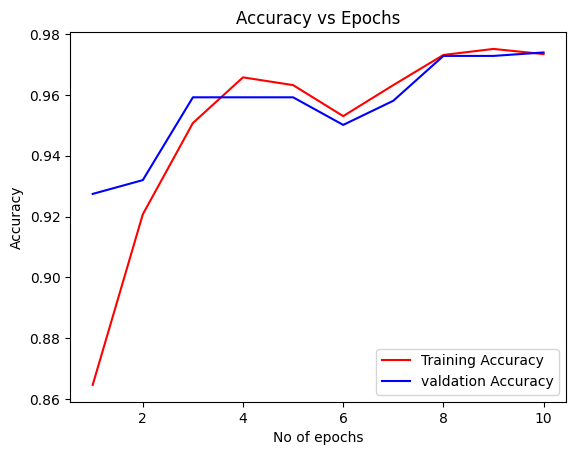

In [87]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='valdation Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()

In [88]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])
